In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
df.fillna(df.mean(), inplace=True)

# change here 
country = 'Germany'
countryQuantity = 'Life expectancy'
countryDataFrame = countryDF(country, df)   

# train test split
randomRowsTrain = countryDataFrame.sample(frac=0.7)
randomRowsTest = countryDataFrame.loc[~countryDataFrame.index.isin(randomRowsTrain.index)]

# train test split row numbers (to keep record of train test split in order to aid plotting)
rowTrain = list(randomRowsTrain['Year'].get_values())
rowTest = list(randomRowsTest['Year'].get_values())

# extract data (countryQuantity) from dataframe depending on the train test split 
countryQuantityTrain = columnExtractor(randomRowsTrain, countryQuantity)
countryQuantityTest = columnExtractor(randomRowsTest, countryQuantity)
#print('Training data (X) : \n',countryQuantityTrain)
#print('Test data (X): \n',countryQuantityTest)

# extract data (allFeatures) from dataframe depending on the train test split 
desiredFeatures = ['Year', 'Total expenditure', 'BMI']
allFeaturesTrain = variableColumnExtractor(randomRowsTrain, desiredFeatures)
allFeaturesTest = variableColumnExtractor(randomRowsTest, desiredFeatures)
#print('Training data (Y): \n',allFeaturesTrain)
#print('Test data (Y): \n',allFeaturesTest)


In [4]:
##Gaussian regression analysis 
lengthScale = np.random.randint(50) 
kernel = C(1.0, (1e-3, 1e3)) * RBF(lengthScale, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gp.fit(allFeaturesTrain, countryQuantityTrain)
countryQuantityPredict, sigma = gp.predict(allFeaturesTest, return_std=True)

In [5]:
##Linear regression analysis 
regr = linear_model.LinearRegression()
regr.fit(allFeaturesTrain, countryQuantityTrain)

countryQuantityPredictLR = regr.predict(allFeaturesTest)

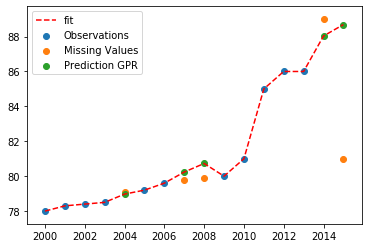

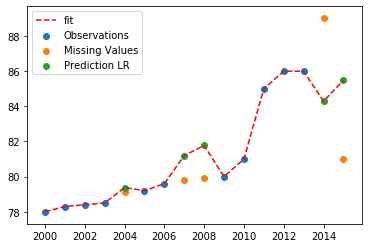

In [6]:
predictValLR = list(zip(rowTest, list(countryQuantityPredictLR)))
predictValLR.sort()

predictValGPR = list(zip(rowTest, list(countryQuantityPredict)))
predictValGPR.sort()

trainVal = list(zip(rowTrain, list(countryQuantityTrain)))
trainVal.sort()

valLR = trainVal + predictValLR
valLR.sort(key = lambda x: x[0]) 

valGPR = trainVal + predictValGPR
valGPR.sort(key = lambda x: x[0])

years, LR = zip(*valLR)
years, GPR = zip(*valGPR)

plt.plot(years, GPR,'r--',label='fit')
plt.scatter(rowTrain,countryQuantityTrain,label='Observations')
plt.scatter(rowTest,countryQuantityTest,label='Missing Values')
plt.scatter(rowTest,countryQuantityPredict,label='Prediction GPR')
plt.legend()
plt.show() 

plt.plot(years, LR,'r--',label='fit')
plt.scatter(rowTrain,countryQuantityTrain,label='Observations')
plt.scatter(rowTest,countryQuantityTest,label='Missing Values')
plt.scatter(rowTest,countryQuantityPredictLR,label='Prediction LR')
plt.legend()
plt.show()

994     -3.000000
995    -10.700000
996     -7.600000
997     -7.500000
998     -6.026214
999     -1.800000
1000    -0.400000
1001     0.337226
1002     0.928357
1003     0.400000
1004     1.800000
1005     5.900000
1006     7.500000
1007     7.600000
1008     9.733080
1009    10.687942
Name: Life expectancy, dtype: float64
994     -3.000000
995    -10.700000
996     -7.600000
997     -7.500000
998     -5.621780
999     -1.800000
1000    -0.400000
1001     1.296417
1002     1.971897
1003     0.400000
1004     1.800000
1005     5.900000
1006     7.500000
1007     7.600000
1008     5.993098
1009     7.473869
Name: Life expectancy, dtype: float64


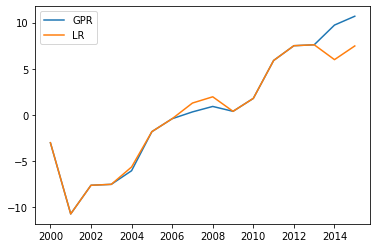

In [9]:
# error computation for GPR 
errorGPR = list(GPR) - countryDataFrame[countryQuantity]
print(errorGPR)
plt.plot(years, errorGPR, label='GPR')

errorLR = list(LR) - countryDataFrame[countryQuantity]
print(errorLR)
plt.plot(years, errorLR, label='LR')
plt.legend()

plt.show()


#print('------------------------------------------')


#go with rmse for outliers 
#try using normalization

In [8]:
#https://yugeten.github.io/posts/2019/09/GP/
#https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html
#https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html#sphx-glr-download-auto-examples-gaussian-process-plot-gpr-co2-py
#https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/statistical_inference/supervised_learning.html
